In [9]:
import pandas as pd
import numpy as np

In [34]:
df=pd.read_csv('amazon_alexa.tsv',sep='\t')

In [35]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [38]:
df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [39]:
df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [86]:
import matplotlib.pyplot as plt

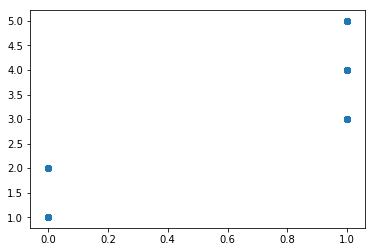

In [89]:
plt.scatter(df.feedback, df.rating,alpha=0.5)

In [91]:
#sentimental analysis

In [25]:
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
ps=PorterStemmer()
Wordnet=WordNetLemmatizer()

corpus=[]
for i in range(0,len(df)):
    review=re.sub('[^a-zA-Z]', ' ', df['verified_reviews'][i])#apart from the words,replacing all the punctuation with space
    review=review.lower()#converting the entire thing to lower case words
    review=review.split()#splitting the entire thing so it gets converted to list
    review=[ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review=' '.join(review)
    corpus.append(review) 

In [26]:
#stemming
corpus

['love echo',
 'love',
 'sometim play game answer question correctli alexa say got wrong answer like abl turn light away home',
 'lot fun thing yr old learn dinosaur control light play game like categori nice sound play music well',
 'music',
 'receiv echo gift need anoth bluetooth someth play music easili access found smart speaker wait see els',
 'without cellphon cannot use mani featur ipad see use great alarm u r almost deaf hear alarm bedroom live room reason enough keep fun ask random question hear respons seem smartbon polit yet',
 'think th one purchas work get one everi room hous realli like featur offer specifili play music echo control light throughout hous',
 'look great',
 'love listen song heard sinc childhood get news weather inform great',
 'sent year old dad talk constantli',
 'love learn knew thing eveyday still figur everyth work far easi use understand make laugh time',
 'purchas mother knee problem give someth tri come get around fast like enjoy littl big thing ale

In [27]:
#lemmatizing
corpus=[]
for i in range(0,len(df)):
    review=re.sub('[^a-zA-Z]', ' ', df['verified_reviews'][i])#apart from the words,replacing all the punctuation with space
    review=review.lower()#converting the entire thing to lower case words
    review=review.split()#splitting the entire thing so it gets converted to list
    review=[Wordnet.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review=' '.join(review)
    corpus.append(review) 

In [28]:
corpus

['love echo',
 'loved',
 'sometimes playing game answer question correctly alexa say got wrong answer like able turn light away home',
 'lot fun thing yr old learns dinosaur control light play game like category nice sound playing music well',
 'music',
 'received echo gift needed another bluetooth something play music easily accessible found smart speaker wait see else',
 'without cellphone cannot use many feature ipad see use great alarm u r almost deaf hear alarm bedroom living room reason enough keep fun ask random question hear response seem smartbon politics yet',
 'think th one purchased working getting one every room house really like feature offer specifily playing music echo controlling light throughout house',
 'look great',
 'love listened song heard since childhood get news weather information great',
 'sent year old dad talk constantly',
 'love learning knew thing eveyday still figuring everything work far easy use understand make laugh time',
 'purchased mother knee prob

In [32]:
#bag of words
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=1500)

In [33]:
X=cv.fit_transform(corpus).toarray()

In [41]:
y=df.iloc[:,4]

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [43]:
#building models

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import model_selection
import warnings
warnings.filterwarnings("ignore")

In [56]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [58]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=0)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name,cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.936190 (0.036898)
LDA: 0.852698 (0.111475)
KNN: 0.916190 (0.042145)
CART: 0.924762 (0.057688)
NB: 0.569206 (0.052550)
SVM: 0.918413 (0.034893)


In [62]:
LR=LogisticRegression()
LDA= LinearDiscriminantAnalysis()
KNN= KNeighborsClassifier()
CART= DecisionTreeClassifier()
NB=GaussianNB()

In [79]:
from sklearn.metrics import accuracy_score

In [80]:
LR.fit(X_train,y_train)
y_pred_lr=LR.predict(X_test)
acc=accuracy_score(y_test,y_pred_lr)
acc

0.9301587301587302

In [78]:
LDA.fit(X_train,y_train)
y_pred_lda=LDA.predict(X_test)
acc=accuracy_score(y_test,y_pred_lda)
acc

0.8031746031746032

In [81]:
KNN.fit(X_train,y_train)
y_pred_knn=KNN.predict(X_test)
acc=accuracy_score(y_test,y_pred_knn)
acc

0.9206349206349206

In [82]:
CART.fit(X_train,y_train)
y_pred_dt=CART.predict(X_test)
acc=accuracy_score(y_test,y_pred_dt)
acc

0.9312169312169312

In [83]:
NB.fit(X_train,y_train)
y_pred_nb=NB.predict(X_test)
acc=accuracy_score(y_test,y_pred_nb)
acc

0.5904761904761905